# Task 12/13
---

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from main import particle_diffusion, particles_simulation_3, average_particle_simulation
from utils import save_solution

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from time import time
import seaborn as sns
plt.style.use("Solarize_Light2")

In [7]:
particle_1 = {
        "r": 12e-9,
        "L": 20e-6,
        "alpha": 0.2,
        "eta": 1e-3,
        "kbt": 26 * 1.60e-22,
        "delta_u": 80 * 1.60e-19,
    }
particle_2 = {
        "r": 3*12e-9,
        "L": 20e-6,
        "alpha": 0.2,
        "eta": 1e-3,
        "kbt": 26 * 1.60e-22,
        "delta_u": 80 * 1.60e-19,
    }
L = particle_1['L']

In [99]:
%%time
N = 5000
# number of particles
max_time = 5 # number of seconds
pos_1, nc_1 = particles_simulation_3(particle_1, max_time, N, potential_on=False)
# pos_2, nc_2 = particles_simulation_3(particle_2, max_time, N)

{'r': 1.2e-08, 'L': 2e-05, 'alpha': 0.2, 'eta': 0.001, 'kbt': 4.16e-21, 'delta_u': 1.28e-17}
Wall time: 11.3 s


In [100]:
x = np.linspace(particle_1['L']*np.min(pos_1[-1]), particle_1['L']*np.max(pos_1[-1]), 10000)
t = np.linspace(0.001,5, 1000)

In [101]:
X, T = np.meshgrid(x, t)
n1 = particle_diffusion(X, T, N, particle_1)

1.8391237868396794e-11


In [102]:
n1.shape, n1.max()

((1000, 10000), 10400402954.512375)

In [103]:
from scipy.integrate import simps

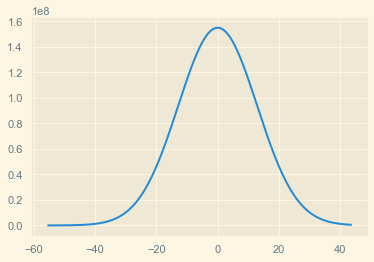

In [104]:
plt.plot(1e6*x,n1[900,:])

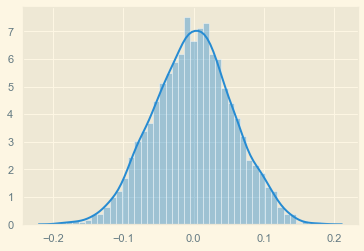

In [105]:
sns.distplot(pos_1[1,:]*particle_1['L'] * 1e6, hist=True)

In [106]:
# dele opp tidsintervall
# konvertere fra si til normalisert

In [107]:
n_si = t.shape[0]
n_no = pos_1.shape[0]

In [108]:
k = 5
step_si = n_si // k
step_no = n_no // k

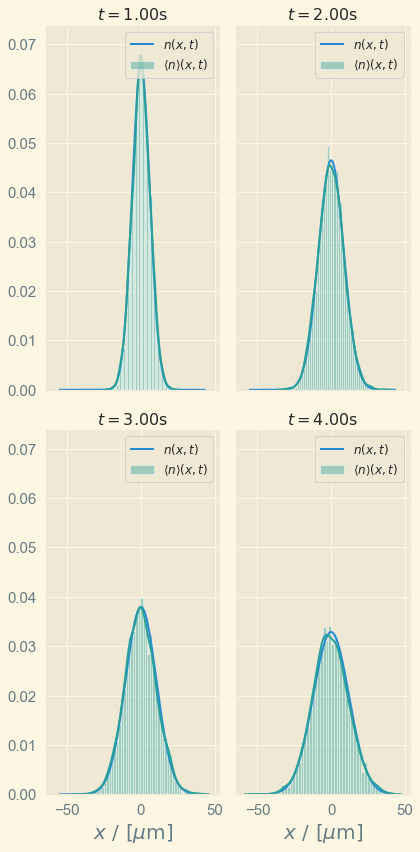

In [127]:
fig, axs = plt.subplots(figsize=(6, 12),nrows = 2, ncols=2, sharex=True, sharey=True, tight_layout=True)
for i, ax in enumerate(axs.flat):
    ax.plot(1e6*x, n1[(i+1)*step_si] / (N*1e6), label = fr"$n(x, t)$")
    sns.distplot(1e6*pos_1[(i+1)*step_no]*particle_1['L'], ax=ax, label=fr"$\langle n\rangle(x, t)$")
    ax.legend(loc='upper right',fontsize=12)
    ax.set_title(fr"$t = {t[(i+1)*step_si]:.2f}\mathrm{{s}}$")
    if i>1:
        ax.set_xlabel(fr"$x\ /\ [\mu \mathrm{{m}}]$", size=20)
    ax.tick_params(labelsize=15)
plt.savefig("img/n_dist_r1.png", facecolor=fig.get_facecolor())

## Flashing on!
---

In [5]:
tau1 = 0.52
tau2 = 3*tau1
N = 5000
max_time = 10

In [8]:
pos1, nc1 = particles_simulation_3(particle_1, max_time,N, tau=tau1, flashing=True)
pos2, nc2 = particles_simulation_3(particle_2, max_time,N, tau=tau1, flashing=True)

{'r': 1.2e-08, 'L': 2e-05, 'alpha': 0.2, 'eta': 0.001, 'kbt': 4.16e-21, 'delta_u': 1.28e-17}
{'r': 3.6e-08, 'L': 2e-05, 'alpha': 0.2, 'eta': 0.001, 'kbt': 4.16e-21, 'delta_u': 1.28e-17}


In [9]:
pos1.shape,pos2.shape

((113176, 5000), (37725, 5000))

In [ ]:
# sns.distplot(1e6*L*pos1[-1])
# sns.distplot(1e6*L*pos2[-1])

In [11]:
k = 5
step1 = pos1.shape[0] //k
step2 = pos2.shape[0] // k


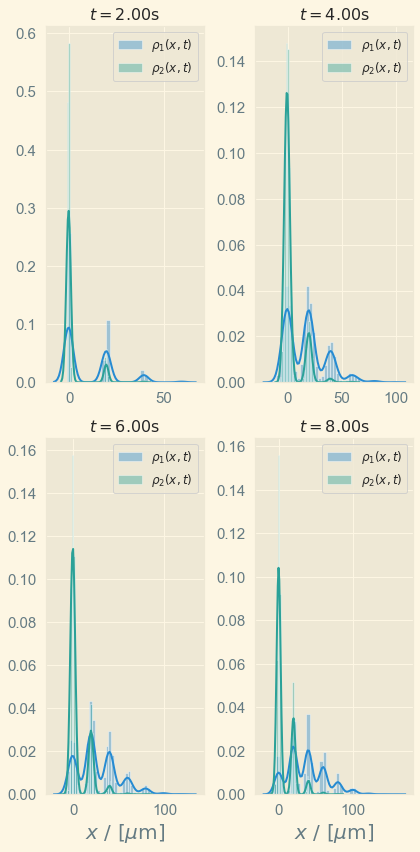

In [163]:
fig, axs = plt.subplots(figsize=(6, 12),nrows = 2, ncols=2, tight_layout=True)
for i, ax in enumerate(axs.flat):
#     ax.plot(1e6*x, n1[(i+1)*step_si] / (N*1e6), label = fr"$n(x, t)$")
    sns.distplot(1e6*pos1[(i+1)*step1]*L, ax=ax, label=fr"$\rho_1(x,t)$")
    sns.distplot(1e6*pos2[(i+1)*step2]*L, ax=ax, label=fr"$\rho_2(x,t)$")
    ax.legend(loc='upper right',fontsize=12)
    ax.set_title(fr"$t = {(i+1)*step1*nc1['dt']/nc1['omega']:.2f}\mathrm{{s}}$")
    if i>1:
        ax.set_xlabel(fr"$x\ /\ [\mu \mathrm{{m}}]$", size=20)
    ax.tick_params(labelsize=15)
plt.savefig(f"img/flashing_drift_{N}.png", facecolor=fig.get_facecolor())

---

In [153]:
def g(x, t):
    return 1/(np.sqrt(t)) * np.exp(-((x - 2*t)**2 / t))*(1-1/2 * np.sin(2*np.pi*x))

In [140]:
x = np.linspace(-10,10, 1000)
t = np.linspace(0,10, 1000)

In [141]:
X, T = np.meshgrid(x, t)

In [154]:
u = g(X, T)

C:\Users\KarlKristian\Anaconda3\envs\numfys\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\KarlKristian\Anaconda3\envs\numfys\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


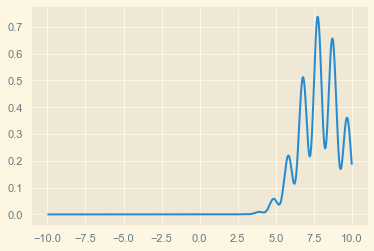

In [155]:
plt.plot(x, u[400])

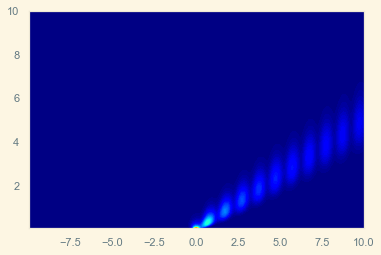

In [162]:
plt.contourf(X[2:,2:], T[2:,2:], u[2:,2:], 100, cmap='jet')

In [79]:
from autograd import grad
import autograd.numpy as npp
def g(x, t):
    return 1/(npp.sqrt(t)) * npp.exp(-((x - 0.5*t)**2 / t)*(1-1/2 * npp.cos(2*npp.pi*x)))


In [83]:
dfx = [grad(g, 0)(xi,1) for xi in x]
dfx2 = [grad(grad(dfx,0))(xi, 1) for xi in x]
dft = [grad(g, 1)(xi, 1) for xi in x]

TypeError: 'list' object is not callable

C:\Users\KarlKristian\Anaconda3\envs\numfys\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\KarlKristian\Anaconda3\envs\numfys\lib\site-packages\autograd\numpy\numpy_vjps.py:75: RuntimeWarning: invalid value encountered in double_scalars
  defvjp(anp.exp,    lambda ans, x : lambda g: ans * g)


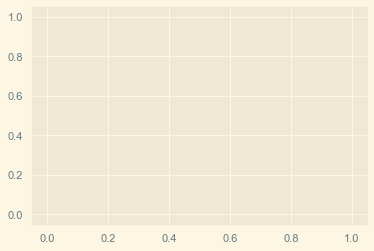

In [82]:
plt.plot(dfx(1., 0))